# Final: saving all HMM data, of which the states timecourses.

## The libraries and methods we need:

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import h5py

In [5]:
import xarray as xr

In [6]:
directory = "E:/timot/Documents/1 - Centrale Marseille/0.5 - Semestre S8/Stage/NIC_250819"
file = "FCK_LOCKED_IC_JYOTIKA_250819.mat"

path = f"{directory}/{file}"

mat_file = h5py.File(path, "r")
cells_refs = mat_file['FCK_LOCKED_IC_JYOTIKA']

n_IC = 4
n_subj = 23

## The routine:

In [12]:
lags = np.arange(-29, 29)
n_lags = lags.shape[0]
n_iter=100
n_states=3    # for the Hidden Markov Model
n_components=40     # For the principal component analysis
covariance_type='diag'
model_type='GMMHMM'
tol=0.01
n_mix=1

origin_dir = "tde-hmm2/3st_1IC/nc_files/"
target_dir = "tde-hmm2/3st_1IC/png_files/"

Test 1 subject

In [91]:
subj = 2
k = 1

su2 IC1
su2 IC2
su2 IC3
su2 IC4


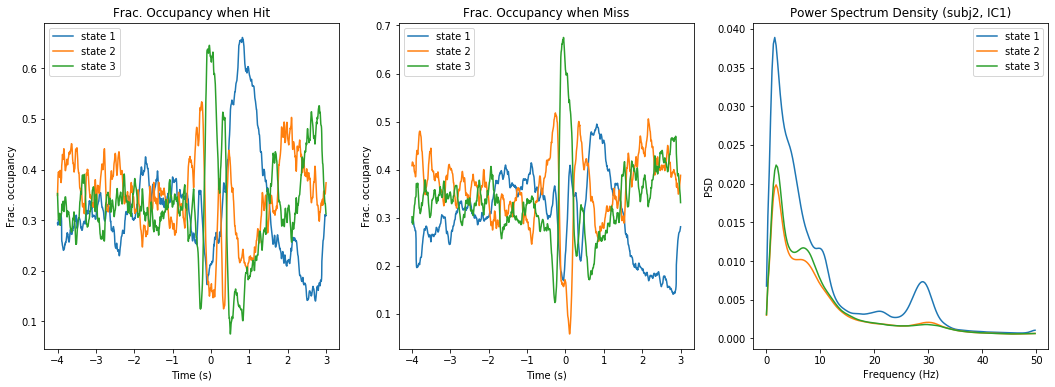

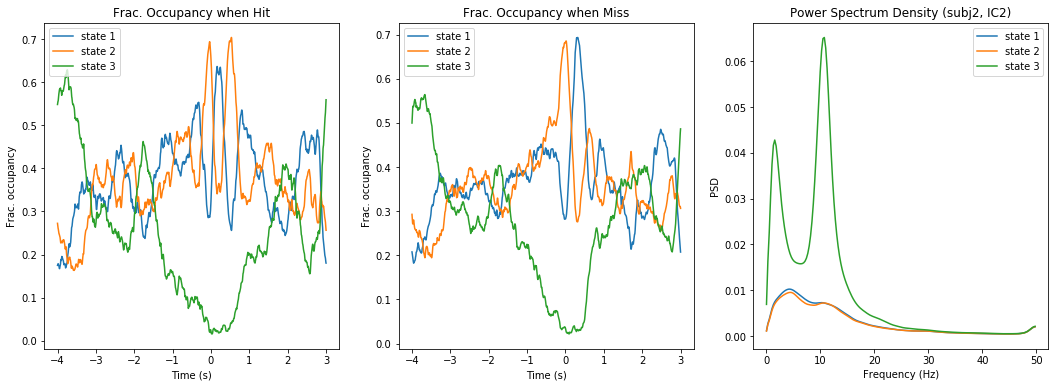

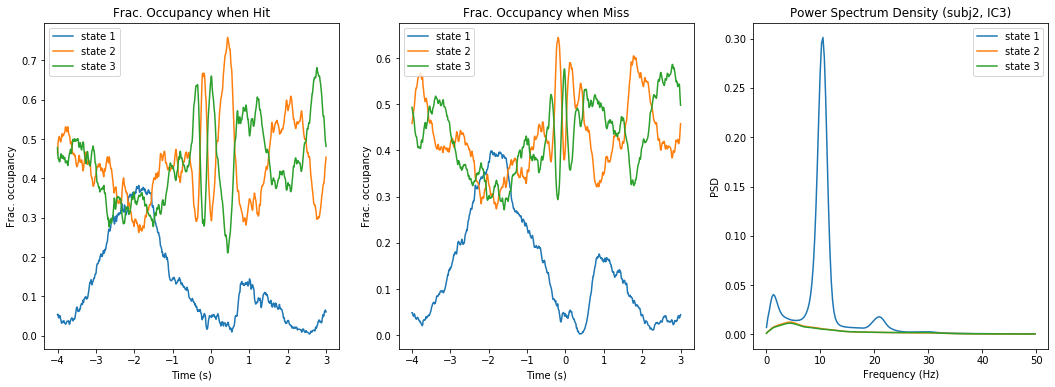

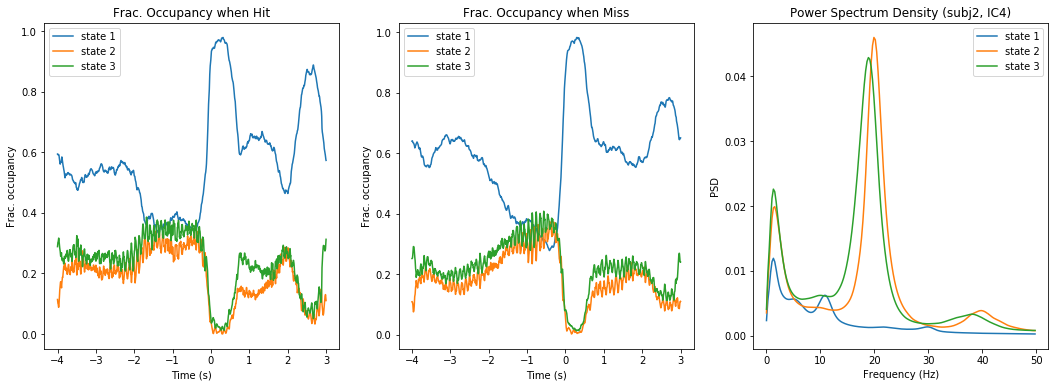

In [92]:
ds = xr.open_dataset(origin_dir+f"su{subj}-3states_data_v2.nc")
cell = mat_file[cells_refs[ds["IC"][0]-1,subj-1]]
trialinfo = cell['trialinfo'][0, :].astype(int)
hit = ((trialinfo/10000).astype(int)==1)
miss = ((trialinfo/10000).astype(int)==2)
frac_occ_hit = (ds["states_timecourse"][:, hit].sum("trials")/hit.sum())
frac_occ_miss = (ds["states_timecourse"][:, miss].sum("trials")/miss.sum())
for i in range(len(ds["IC"].values)):
    labels = [f"state {state}" for state in ds["states"].values]
    fig = plt.figure(figsize=(18,6))
    plt.subplot(k, 3, 1)
    plt.title(f'Frac. Occupancy when Hit')
    plt.plot(ds["time"], frac_occ_hit.values[i,])
    plt.xlabel('Time (s)')
    plt.ylabel('Frac. occupancy')
    plt.legend(labels, loc='upper left')
    plt.subplot(k, 3, 2)
    plt.title(f'Frac. Occupancy when Miss')
    plt.plot(ds["time"], frac_occ_miss.values[i,])
    plt.xlabel('Time (s)')
    plt.ylabel('Frac. occupancy')
    plt.legend(labels, loc='upper left')
    plt.subplot(k, 3, 3)
    plt.title(f"Power Spectrum Density (subj{subj}, IC{ds['IC'].values[i]})")
    plt.plot(ds["freq"], ds["states_psd"].values[i,].T)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('PSD')
    plt.legend(labels, loc='upper right')
#     plt.savefig(target_dir+f"su{subj}IC{ds['IC'].values[i]}-frac_occ_HitMiss.png", dpi=300)
#     plt.close(fig)
    print(f"su{subj} IC{ds['IC'].values[i]}")

Save plots All subjects

In [45]:
subj_list = [i for i in range(2,9)] + [i for i in range(10,13)] + [14] + [i for i in range(16, n_subj+1)] 
                                                                            # All except subjects 1, 9, 13, 15
for subj in subj_list:
    ds = xr.open_dataset(origin_dir+f"su{subj}-3states_data_v2.nc")
    cell = mat_file[cells_refs[ds["IC"][0]-1,subj-1]]
    trialinfo = cell['trialinfo'][0, :].astype(int)
    hit = ((trialinfo/10000).astype(int)==1)
    miss = ((trialinfo/10000).astype(int)==2)
    frac_occ_hit = (ds["states_timecourse"][:, hit].sum("trials")/hit.sum())
    frac_occ_miss = (ds["states_timecourse"][:, miss].sum("trials")/miss.sum())
    for i in range(len(ds["IC"].values)):
        labels = [f"state {state}" for state in ds["states"].values]
        fig = plt.figure(figsize=(18,6))
        plt.subplot(131)
        plt.title(f'Frac. Occupancy when Hit')
        plt.plot(ds["time"], frac_occ_hit.values[i,])
        plt.xlabel('Time (s)')
        plt.ylabel('Frac. occupancy')
        plt.legend(labels, loc='upper left')
        plt.subplot(132)
        plt.title(f'Frac. Occupancy when Miss')
        plt.plot(ds["time"], frac_occ_miss.values[i,])
        plt.xlabel('Time (s)')
        plt.ylabel('Frac. occupancy')
        plt.legend(labels, loc='upper left')
        plt.subplot(133)
        plt.title(f"Power Spectrum Density (subj{subj}, IC{ds['IC'].values[i]})")
        plt.plot(ds["freq"], ds["states_psd"].values[i,].T)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('PSD')
        plt.legend(labels, loc='upper right')
        plt.savefig(target_dir+f"su{subj}IC{ds['IC'].values[i]}-frac_occ_HitMiss.png", dpi=300)
        plt.close(fig)
    print(f"su{subj} done")
    ds.close()

su2 IC1
su2 IC2
su2 IC3
su2 IC4
su3 IC1
su3 IC2
su3 IC3
su3 IC4
su4 IC1
su4 IC2
su4 IC3
su4 IC4
su5 IC1
su5 IC3
su5 IC4
su6 IC1
su6 IC2
su6 IC3
su6 IC4
su7 IC1
su7 IC2
su7 IC3
su7 IC4
su8 IC1
su8 IC2
su8 IC3
su8 IC4
su10 IC1
su10 IC2
su10 IC3
su10 IC4
su11 IC1
su11 IC2
su11 IC3
su11 IC4
su12 IC1
su12 IC2
su12 IC3
su14 IC1
su14 IC2
su14 IC3
su14 IC4
su16 IC1
su16 IC2
su16 IC3
su16 IC4
su17 IC1
su17 IC2
su17 IC4
su18 IC1
su18 IC2
su18 IC3
su18 IC4
su19 IC1
su19 IC2
su19 IC3
su19 IC4
su20 IC2
su20 IC3
su20 IC4
su21 IC2
su21 IC3
su21 IC4
su22 IC1
su22 IC2
su22 IC3
su22 IC4
su23 IC1
su23 IC2
su23 IC4


Other data

Test

In [83]:
subj = 20
k = 1

In [ ]:
subj_list = [i for i in range(2,9)] + [i for i in range(10,13)] + [14] + [i for i in range(16, n_subj+1)] 
                                                                            # All except subjects 1, 9, 13, 15
for subj in subj_list:
    ds = xr.open_dataset(origin_dir+f"su{subj}-3states_data_v2.nc")
    cell = mat_file[cells_refs[ds["IC"][0]-1,subj-1]]
    trialinfo = cell['trialinfo'][0, :].astype(int)
    hit = ((trialinfo/10000).astype(int)==1)
    miss = ((trialinfo/10000).astype(int)==2)
    
    vect = (trialinfo/100).astype(int)-((trialinfo/1000).astype(int))*10
    val=[]
    for i in range(vect.min(), vect.max()+1):
        boo = (vect==i)
        val.append((boo, i, boo.sum()))
    
    labels = [f"state {state}" for state in ds["states"].values]
    for i in range(len(ds["IC"].values)):
        fig = plt.figure(figsize=(18,k*6))
        for k in range(len(val)):
            frac_occ_hit = (ds["states_timecourse"].values[:, hit&(val[k][0])].sum("trials")/(hit&(val[k][0])).sum())
            frac_occ_miss = (ds["states_timecourse"].values[:, miss&(val[k][0])].sum("trials")/(miss&(val[k][0])).sum())
            plt.subplot(k, 3, 1)
            plt.title(f'Frac. Occupancy for val{val[k][1]} when Hit (n_trials={val[k][2]})')
            plt.plot(ds["time"], frac_occ_hit[i,])
            plt.xlabel('Time (s)')
            plt.ylabel('Frac. occupancy')
            plt.legend(labels, loc='upper left')
            plt.subplot(k, 3, 2)
            plt.title(f'Frac. Occupancy for val{val[k][1]} when Miss (n_trials={val[k][2]})')
            plt.plot(ds["time"], frac_occ_miss[i,])
            plt.xlabel('Time (s)')
            plt.ylabel('Frac. occupancy')
            plt.legend(labels, loc='upper left')
            plt.subplot(k, 3, 3)
            plt.title(f"Power Spectrum Density (subj{subj}, IC{ds['IC'].values[i]})")
            plt.plot(ds["freq"], ds["states_psd"].values[i,].T)
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('PSD')
            plt.legend(labels, loc='upper right')
        plt.savefig(target_dir+f"su{subj}IC{ds['IC'].values[i]}-frac_occ_HitMiss_digit3.png", dpi=300)
        plt.close(fig)
    print(f"su{subj} done")
    ds.close()

### Hit VS Miss (col1 : 1 VS 2) pour les essais tq col2 == 5

Test 1 subj

In [105]:
subj = 2

In [106]:
ds = xr.open_dataset(origin_dir+f"su{subj}-3states_data_v2.nc")
cell = mat_file[cells_refs[ds["IC"][0]-1,subj-1]]
trialinfo = cell['trialinfo'][0, :].astype(int)
hit = ((trialinfo/10000).astype(int)==1)
miss = ((trialinfo/10000).astype(int)==2)

In [107]:
trialinfo

array([15100, 15100, 15100, 15100, 15100, 15100, 15210, 15200, 15200,
       25300, 15300, 15300, 15300, 15300, 15300, 22210, 12310, 12210,
       12300, 12300, 12210, 21110, 21210, 11110, 11101, 23212, 23203,
       23204, 23205, 21206, 21200, 21211, 23312, 23303, 23304, 23305,
       21306, 21110, 11100, 21210, 23312, 23303, 23305, 21306, 11110,
       21210, 21111, 23212, 23203, 13204, 23205, 21206, 21110, 21110,
       21100, 23312, 13303, 21306, 21210, 21110, 21210, 21111, 23203,
       23204, 23205, 21206, 21200, 11110, 21211, 23312, 23303, 23304,
       23305, 21210, 21111, 23212, 23203, 23204, 23205, 21206, 21110,
       21100, 21210, 11200, 21111, 23212, 23203, 23204, 23205, 21206,
       21110, 21100, 21100, 21210, 21200, 11201, 23312, 13303, 23304,
       23305, 21306, 21210, 11111, 23212, 23203, 23204, 21200, 21200,
       11110, 21101, 23212, 23203, 23204, 21206, 21200, 21110, 23305,
       21210, 21210, 21200, 11111, 23212, 23203, 23204, 23205, 21206,
       21210, 21110,

In [108]:
vect = (trialinfo/1000).astype(int)-((trialinfo/10000).astype(int))*10
print("max: ", vect.max(), " min: ", vect.min())

max:  5  min:  1


In [109]:
vect==(0|1)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True, False, False, False,  True,  True,
        True,  True, False, False, False,  True,  True,  True, False,
        True,  True,  True,  True, False, False, False, False,  True,
        True,  True,

In [104]:
(hit&(vect==(0|1))).sum()

109

In [110]:
ds["states_timecourse"].dims

('IC', 'trials', 'time', 'states')

su2 done


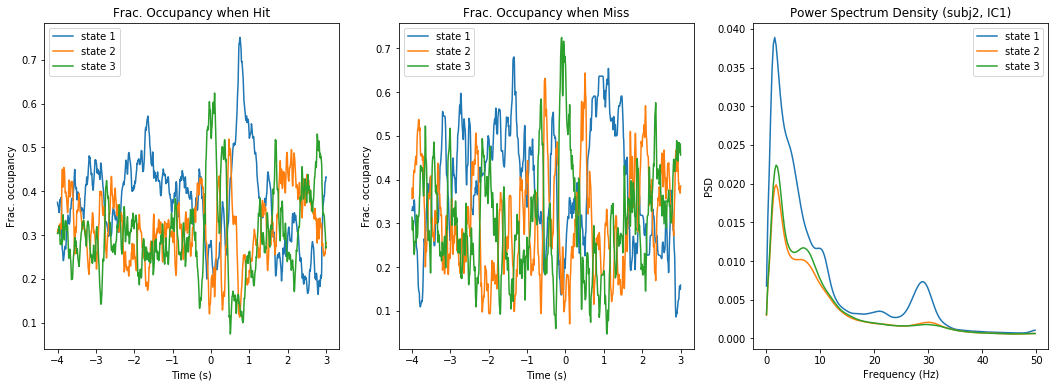

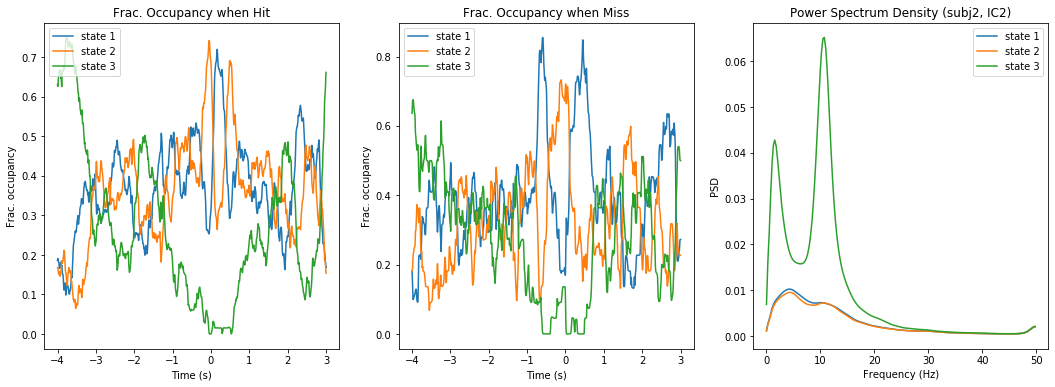

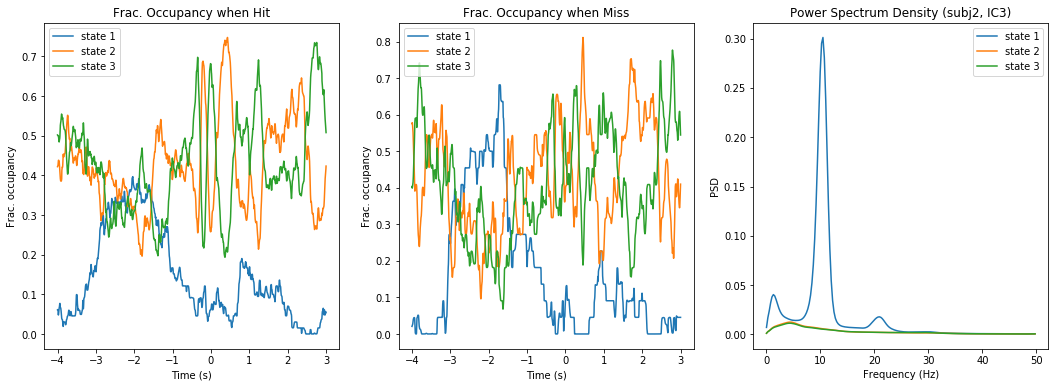

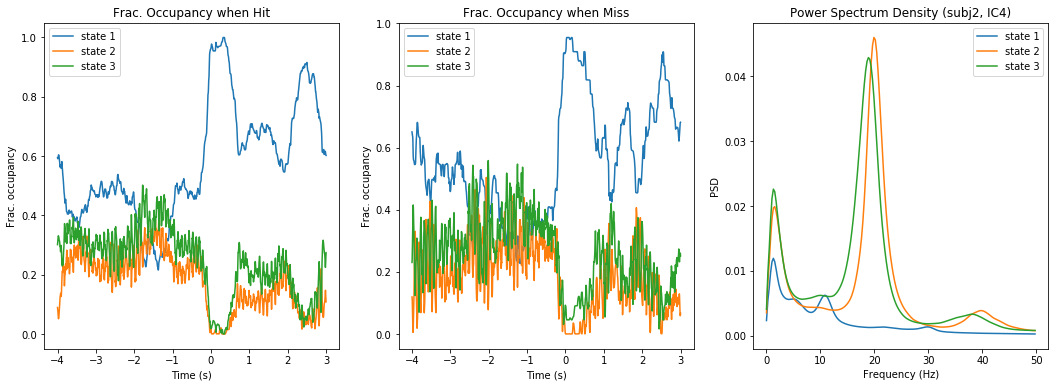

In [101]:
ds = xr.open_dataset(origin_dir+f"su{subj}-3states_data_v2.nc")
cell = mat_file[cells_refs[ds["IC"][0]-1,subj-1]]
trialinfo = cell['trialinfo'][0, :].astype(int)
hit = ((trialinfo/10000).astype(int)==1)
miss = ((trialinfo/10000).astype(int)==2)

vect = (trialinfo/1000).astype(int)-((trialinfo/10000).astype(int))*10

frac_occ_hit = (ds["states_timecourse"][:, hit&(vect==5)].sum("trials")/(hit&(vect==5)).sum())
frac_occ_miss = (ds["states_timecourse"][:, miss&(vect==5)].sum("trials")/(miss&(vect==5)).sum())
for i in range(len(ds["IC"].values)):
    labels = [f"state {state}" for state in ds["states"].values]
    fig = plt.figure(figsize=(18,6))
    plt.subplot(131)
    plt.title(f'Frac. Occupancy when Hit')
    plt.plot(ds["time"], frac_occ_hit.values[i,])
    plt.xlabel('Time (s)')
    plt.ylabel('Frac. occupancy')
    plt.legend(labels, loc='upper left')
    plt.subplot(132)
    plt.title(f'Frac. Occupancy when Miss')
    plt.plot(ds["time"], frac_occ_miss.values[i,])
    plt.xlabel('Time (s)')
    plt.ylabel('Frac. occupancy')
    plt.legend(labels, loc='upper left')
    plt.subplot(133)
    plt.title(f"Power Spectrum Density (subj{subj}, IC{ds['IC'].values[i]})")
    plt.plot(ds["freq"], ds["states_psd"].values[i,].T)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('PSD')
    plt.legend(labels, loc='upper right')
#     plt.savefig(target_dir+f"su{subj}IC{ds['IC'].values[i]}-frac_occ_HitMiss_col2is5.png", dpi=300)
#     plt.close(fig)
print(f"su{subj} done")
ds.close()

Save All subj

In [102]:
subj_list = [i for i in range(2,9)] + [i for i in range(10,13)] + [14] + [i for i in range(16, n_subj+1)] 
                                                                            # All except subjects 1, 9, 13, 15
for subj in subj_list:
    ds = xr.open_dataset(origin_dir+f"su{subj}-3states_data_v2.nc")
    cell = mat_file[cells_refs[ds["IC"][0]-1,subj-1]]
    trialinfo = cell['trialinfo'][0, :].astype(int)
    hit = ((trialinfo/10000).astype(int)==1)
    miss = ((trialinfo/10000).astype(int)==2)
    
    vect = (trialinfo/1000).astype(int)-((trialinfo/10000).astype(int))*10
    
    frac_occ_hit = (ds["states_timecourse"][:, hit&(vect==5)].sum("trials")/(hit&(vect==5)).sum())
    frac_occ_miss = (ds["states_timecourse"][:, miss&(vect==5)].sum("trials")/(miss&(vect==5)).sum())
    for i in range(len(ds["IC"].values)):
        labels = [f"state {state}" for state in ds["states"].values]
        fig = plt.figure(figsize=(18,6))
        plt.subplot(131)
        plt.title(f'Frac. Occupancy when Hit')
        plt.plot(ds["time"], frac_occ_hit.values[i,])
        plt.xlabel('Time (s)')
        plt.ylabel('Frac. occupancy')
        plt.legend(labels, loc='upper left')
        plt.subplot(132)
        plt.title(f'Frac. Occupancy when Miss')
        plt.plot(ds["time"], frac_occ_miss.values[i,])
        plt.xlabel('Time (s)')
        plt.ylabel('Frac. occupancy')
        plt.legend(labels, loc='upper left')
        plt.subplot(133)
        plt.title(f"Power Spectrum Density (subj{subj}, IC{ds['IC'].values[i]})")
        plt.plot(ds["freq"], ds["states_psd"].values[i,].T)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('PSD')
        plt.legend(labels, loc='upper right')
        plt.savefig(target_dir+f"su{subj}IC{ds['IC'].values[i]}-frac_occ_HitMiss_col2is5.png", dpi=300)
        plt.close(fig)
    print(f"su{subj} done")
    ds.close()

su2 done
su3 done
su4 done
su5 done
su6 done
su7 done
su8 done
su10 done
su11 done
su12 done
su14 done
su16 done
su17 done
su18 done
su19 done
su20 done
su21 done
su22 done
su23 done


### Hit VS Miss (col1 : 1 VS 2) pour les essais tq col5 == (0|1)

Test 1 subj

In [155]:
subj = 2

In [156]:
ds = xr.open_dataset(origin_dir+f"su{subj}-3states_data_v2.nc")
cell = mat_file[cells_refs[ds["IC"][0]-1,subj-1]]
trialinfo = cell['trialinfo'][0, :].astype(int)
hit = ((trialinfo/10000).astype(int)==1)
miss = ((trialinfo/10000).astype(int)==2)

In [157]:
trialinfo[:80]

array([15100, 15100, 15100, 15100, 15100, 15100, 15210, 15200, 15200,
       25300, 15300, 15300, 15300, 15300, 15300, 22210, 12310, 12210,
       12300, 12300, 12210, 21110, 21210, 11110, 11101, 23212, 23203,
       23204, 23205, 21206, 21200, 21211, 23312, 23303, 23304, 23305,
       21306, 21110, 11100, 21210, 23312, 23303, 23305, 21306, 11110,
       21210, 21111, 23212, 23203, 13204, 23205, 21206, 21110, 21110,
       21100, 23312, 13303, 21306, 21210, 21110, 21210, 21111, 23203,
       23204, 23205, 21206, 21200, 11110, 21211, 23312, 23303, 23304,
       23305, 21210, 21111, 23212, 23203, 23204, 23205, 21206])

In [158]:
vect = trialinfo-((trialinfo/10).astype(int))*10
print("max: ", vect.max(), " min: ", vect.min())

max:  6  min:  0


In [159]:
vect[:80]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 0, 0, 2, 3, 5, 6,
       0, 0, 1, 2, 3, 4, 5, 6, 0, 0, 0, 2, 3, 6, 0, 0, 0, 1, 3, 4, 5, 6,
       0, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 6])

In [160]:
vect = ((vect==0)|(vect==1))
vect[:80]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False,  True,  True,  True, False, False, False, False,  True,
        True,  True, False, False, False, False, False,  True,  True,
        True, False, False, False,  True,  True,  True,  True, False,
       False, False, False,  True,  True,  True, False, False, False,
       False,  True,  True, False, False, False, False, False])

In [161]:
print(vect.sum())
print((hit&vect).sum())
print((miss&vect).sum())

388
200
188


su2 done


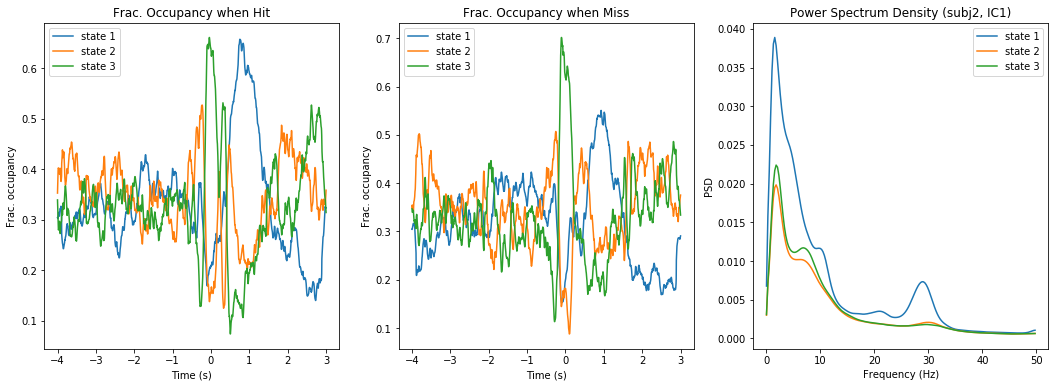

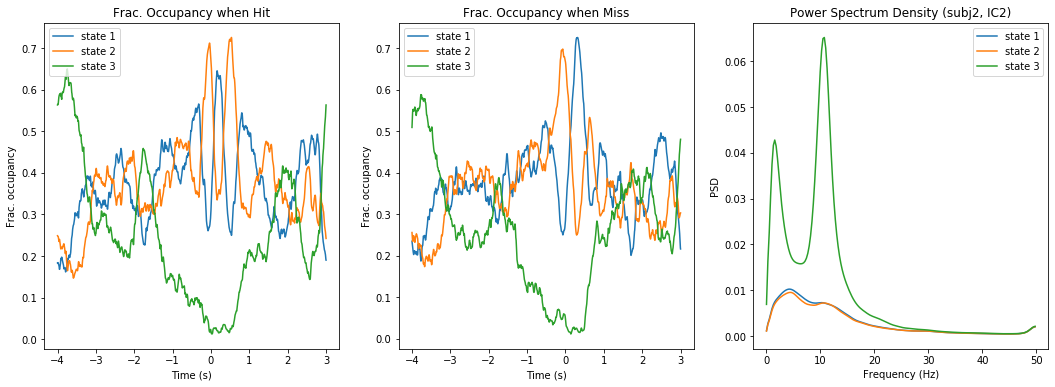

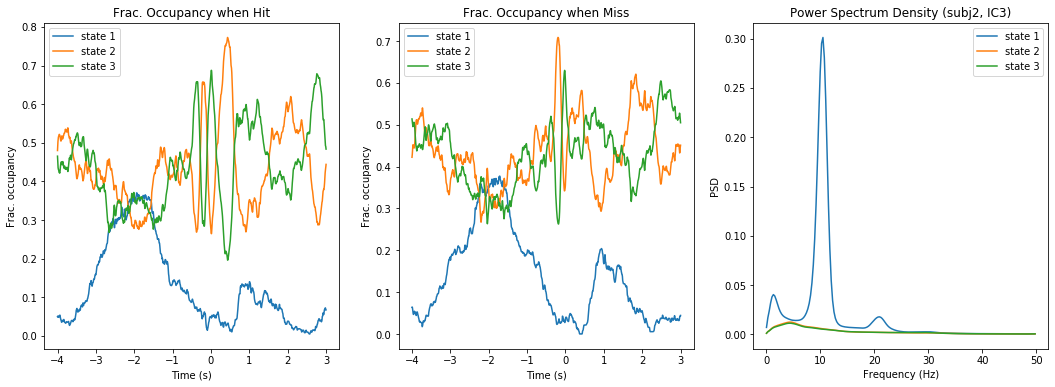

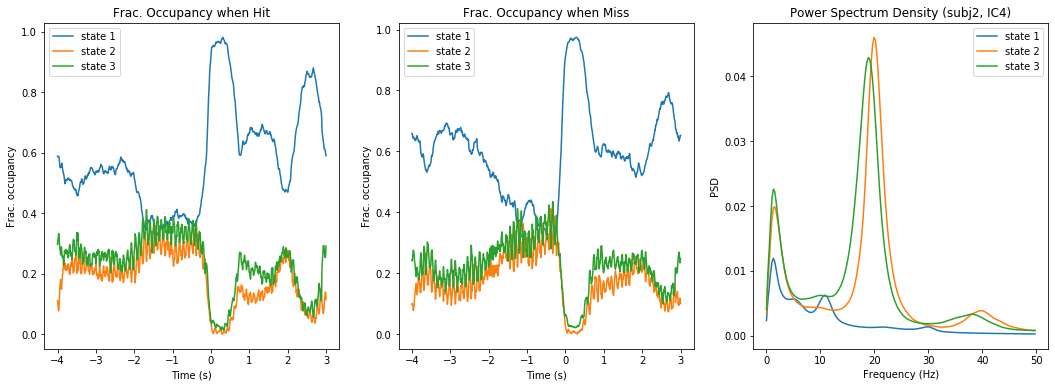

In [135]:
ds = xr.open_dataset(origin_dir+f"su{subj}-3states_data_v2.nc")
cell = mat_file[cells_refs[ds["IC"][0]-1,subj-1]]
trialinfo = cell['trialinfo'][0, :].astype(int)
hit = ((trialinfo/10000).astype(int)==1)
miss = ((trialinfo/10000).astype(int)==2)

vect = trialinfo-((trialinfo/10).astype(int))*10
vect = ((vect==0)|(vect==1))

frac_occ_hit = (ds["states_timecourse"][:, hit&vect].sum("trials")/(hit&vect).sum())
frac_occ_miss = (ds["states_timecourse"][:, miss&vect].sum("trials")/(miss&vect).sum())
for i in range(len(ds["IC"].values)):
    labels = [f"state {state}" for state in ds["states"].values]
    fig = plt.figure(figsize=(18,6))
    plt.subplot(131)
    plt.title(f'Frac. Occupancy when Hit')
    plt.plot(ds["time"], frac_occ_hit.values[i,])
    plt.xlabel('Time (s)')
    plt.ylabel('Frac. occupancy')
    plt.legend(labels, loc='upper left')
    plt.subplot(132)
    plt.title(f'Frac. Occupancy when Miss')
    plt.plot(ds["time"], frac_occ_miss.values[i,])
    plt.xlabel('Time (s)')
    plt.ylabel('Frac. occupancy')
    plt.legend(labels, loc='upper left')
    plt.subplot(133)
    plt.title(f"Power Spectrum Density (subj{subj}, IC{ds['IC'].values[i]})")
    plt.plot(ds["freq"], ds["states_psd"].values[i,].T)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('PSD')
    plt.legend(labels, loc='upper right')
#     plt.savefig(target_dir+f"su{subj}IC{ds['IC'].values[i]}-frac_occ_HitMiss_col5is0or1.png", dpi=300)
#     plt.close(fig)
print(f"su{subj} done")
ds.close()

Save All subj

In [136]:
subj_list = [i for i in range(2,9)] + [i for i in range(10,13)] + [14] + [i for i in range(16, n_subj+1)] 
                                                                            # All except subjects 1, 9, 13, 15
for subj in subj_list:
    ds = xr.open_dataset(origin_dir+f"su{subj}-3states_data_v2.nc")
    cell = mat_file[cells_refs[ds["IC"][0]-1,subj-1]]
    trialinfo = cell['trialinfo'][0, :].astype(int)
    hit = ((trialinfo/10000).astype(int)==1)
    miss = ((trialinfo/10000).astype(int)==2)
    
    vect = trialinfo-((trialinfo/10).astype(int))*10
    vect = ((vect==0)|(vect==1))
    
    frac_occ_hit = (ds["states_timecourse"][:, hit&vect].sum("trials")/(hit&vect).sum())
    frac_occ_miss = (ds["states_timecourse"][:, miss&vect].sum("trials")/(miss&vect).sum())
    for i in range(len(ds["IC"].values)):
        labels = [f"state {state}" for state in ds["states"].values]
        fig = plt.figure(figsize=(18,6))
        plt.subplot(131)
        plt.title(f'Frac. Occupancy when Hit')
        plt.plot(ds["time"], frac_occ_hit.values[i,])
        plt.xlabel('Time (s)')
        plt.ylabel('Frac. occupancy')
        plt.legend(labels, loc='upper left')
        plt.subplot(132)
        plt.title(f'Frac. Occupancy when Miss')
        plt.plot(ds["time"], frac_occ_miss.values[i,])
        plt.xlabel('Time (s)')
        plt.ylabel('Frac. occupancy')
        plt.legend(labels, loc='upper left')
        plt.subplot(133)
        plt.title(f"Power Spectrum Density (subj{subj}, IC{ds['IC'].values[i]})")
        plt.plot(ds["freq"], ds["states_psd"].values[i,].T)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('PSD')
        plt.legend(labels, loc='upper right')
        plt.savefig(target_dir+f"su{subj}IC{ds['IC'].values[i]}-frac_occ_HitMiss_col5is0or1.png", dpi=300)
        plt.close(fig)
    print(f"su{subj} done")
    ds.close()

su2 done
su3 done
su4 done
su5 done
su6 done
su7 done
su8 done
su10 done
su11 done
su12 done
su14 done
su16 done
su17 done
su18 done
su19 done
su20 done
su21 done
su22 done
su23 done


### Catch VS Baseline ( col5 : 2 VS (0|1) ) pour les essais tq col1 == 2 (Miss)

Test 1 subj

In [137]:
subj = 2

In [138]:
ds = xr.open_dataset(origin_dir+f"su{subj}-3states_data_v2.nc")
cell = mat_file[cells_refs[ds["IC"][0]-1,subj-1]]
trialinfo = cell['trialinfo'][0, :].astype(int)
catchVSbaseline = trialinfo-((trialinfo/10).astype(int))*10
catch = (catchVSbaseline==2)
baseline = ( (catchVSbaseline==0)|(catchVSbaseline==1) )

In [139]:
catch[:30]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False])

In [140]:
baseline[:30]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False])

In [141]:
trialinfo[:30]

array([15100, 15100, 15100, 15100, 15100, 15100, 15210, 15200, 15200,
       25300, 15300, 15300, 15300, 15300, 15300, 22210, 12310, 12210,
       12300, 12300, 12210, 21110, 21210, 11110, 11101, 23212, 23203,
       23204, 23205, 21206])

In [142]:
vect = (trialinfo/10000).astype(int)
print("max: ", vect.max(), " min: ", vect.min())

max:  2  min:  1


In [143]:
vect[:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2])

In [144]:
vect = (vect==2)
vect[:30]

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False,  True,  True, False, False,  True,  True,
        True,  True,  True])

In [150]:
print((vect&(catch|baseline)).sum())
print((catch&vect).sum())
print((baseline&vect).sum())

246
58
188


su2 done


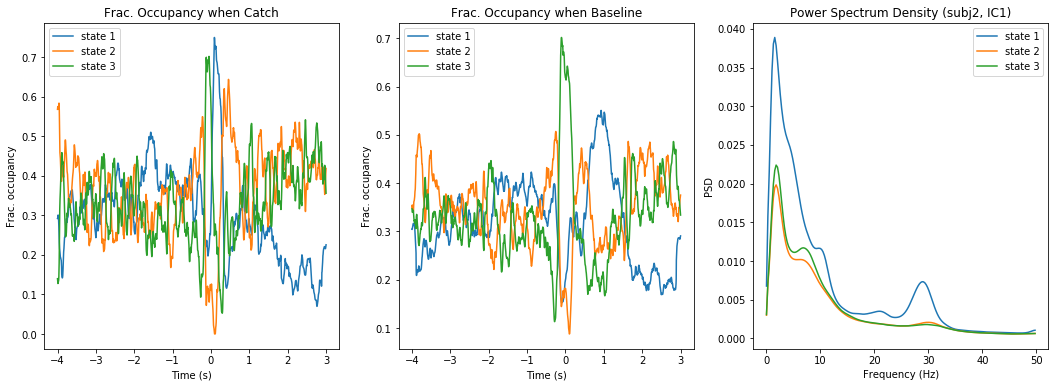

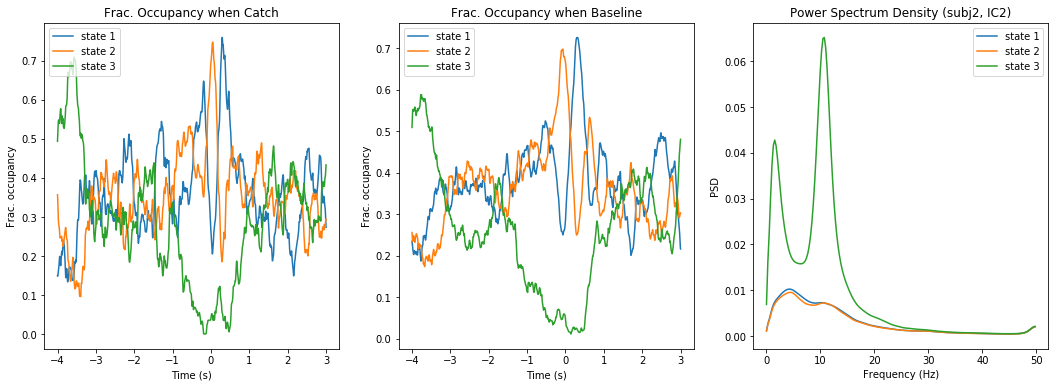

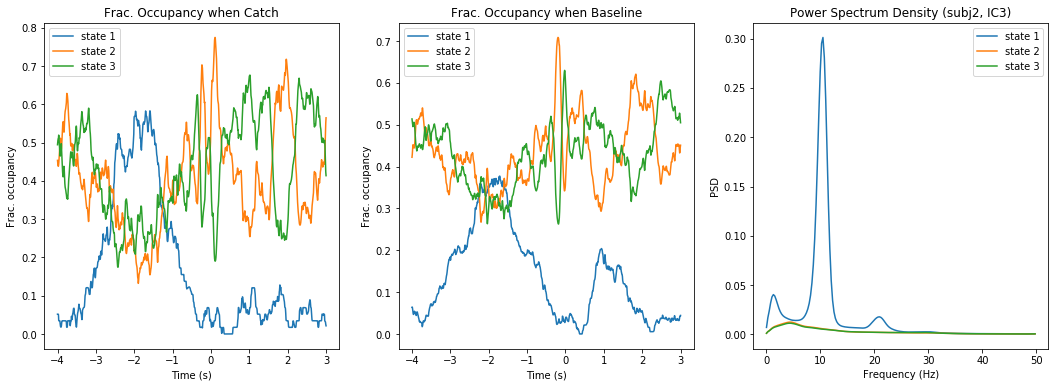

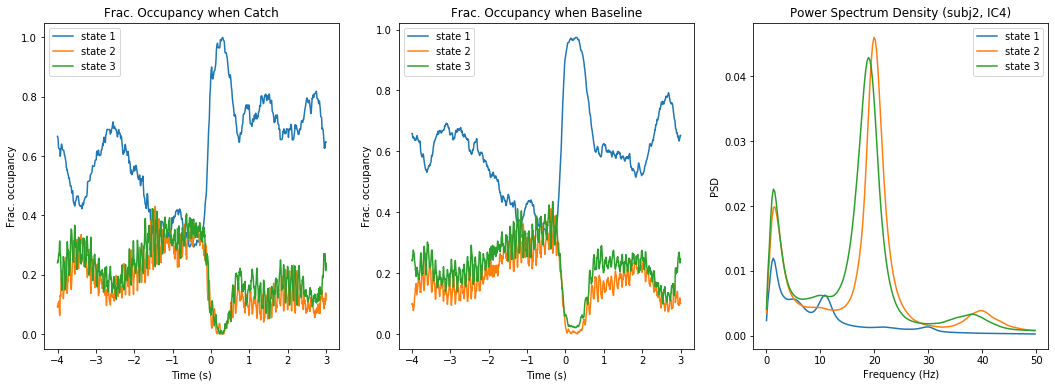

In [152]:
ds = xr.open_dataset(origin_dir+f"su{subj}-3states_data_v2.nc")
cell = mat_file[cells_refs[ds["IC"][0]-1,subj-1]]
trialinfo = cell['trialinfo'][0, :].astype(int)
catchVSbaseline = trialinfo-((trialinfo/10).astype(int))*10
catch = (catchVSbaseline==2)
baseline = ( (catchVSbaseline==0)|(catchVSbaseline==1) )

vect = (trialinfo/10000).astype(int)
vect = (vect==2)

frac_occ_hit = (ds["states_timecourse"][:, catch&vect].sum("trials")/(catch&vect).sum())
frac_occ_miss = (ds["states_timecourse"][:, baseline&vect].sum("trials")/(baseline&vect).sum())
for i in range(len(ds["IC"].values)):
    labels = [f"state {state}" for state in ds["states"].values]
    fig = plt.figure(figsize=(18,6))
    plt.subplot(131)
    plt.title(f'Frac. Occupancy when Catch')
    plt.plot(ds["time"], frac_occ_hit.values[i,])
    plt.xlabel('Time (s)')
    plt.ylabel('Frac. occupancy')
    plt.legend(labels, loc='upper left')
    plt.subplot(132)
    plt.title(f'Frac. Occupancy when Baseline')
    plt.plot(ds["time"], frac_occ_miss.values[i,])
    plt.xlabel('Time (s)')
    plt.ylabel('Frac. occupancy')
    plt.legend(labels, loc='upper left')
    plt.subplot(133)
    plt.title(f"Power Spectrum Density (subj{subj}, IC{ds['IC'].values[i]})")
    plt.plot(ds["freq"], ds["states_psd"].values[i,].T)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('PSD')
    plt.legend(labels, loc='upper right')
#     plt.savefig(target_dir+f"su{subj}IC{ds['IC'].values[i]}-frac_occ_CatchBaseline_col1is2.png", dpi=300)
#     plt.close(fig)
print(f"su{subj} done")
ds.close()

Save All subj

In [154]:
subj_list = [i for i in range(2,9)] + [i for i in range(10,13)] + [14] + [i for i in range(16, n_subj+1)] 
                                                                            # All except subjects 1, 9, 13, 15
for subj in subj_list:
    ds = xr.open_dataset(origin_dir+f"su{subj}-3states_data_v2.nc")
    cell = mat_file[cells_refs[ds["IC"][0]-1,subj-1]]
    trialinfo = cell['trialinfo'][0, :].astype(int)
    catchVSbaseline = trialinfo-((trialinfo/10).astype(int))*10
    catch = (catchVSbaseline==2)
    baseline = ( (catchVSbaseline==0)|(catchVSbaseline==1) )
    
    vect = (trialinfo/10000).astype(int)
    vect = (vect==2)
    
    frac_occ_hit = (ds["states_timecourse"][:, catch&vect].sum("trials")/(catch&vect).sum())
    frac_occ_miss = (ds["states_timecourse"][:, baseline&vect].sum("trials")/(baseline&vect).sum())
    for i in range(len(ds["IC"].values)):
        labels = [f"state {state}" for state in ds["states"].values]
        fig = plt.figure(figsize=(18,6))
        plt.subplot(131)
        plt.title(f'Frac. Occupancy when Catch')
        plt.plot(ds["time"], frac_occ_hit.values[i,])
        plt.xlabel('Time (s)')
        plt.ylabel('Frac. occupancy')
        plt.legend(labels, loc='upper left')
        plt.subplot(132)
        plt.title(f'Frac. Occupancy when Baseline')
        plt.plot(ds["time"], frac_occ_miss.values[i,])
        plt.xlabel('Time (s)')
        plt.ylabel('Frac. occupancy')
        plt.legend(labels, loc='upper left')
        plt.subplot(133)
        plt.title(f"Power Spectrum Density (subj{subj}, IC{ds['IC'].values[i]})")
        plt.plot(ds["freq"], ds["states_psd"].values[i,].T)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('PSD')
        plt.legend(labels, loc='upper right')
        plt.savefig(target_dir+f"su{subj}IC{ds['IC'].values[i]}-frac_occ_CatchBaseline_col1is2.png", dpi=300)
        plt.close(fig)
    print(f"su{subj} done")
    ds.close()

su2 done
su3 done


C:\ProgramData\Anaconda3\lib\site-packages\scipy\io\netcdf.py:317: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


su4 done
su5 done
su6 done
su7 done
su8 done
su10 done
su11 done
su12 done
su14 done
su16 done
su17 done
su18 done
su19 done
su20 done
su21 done
su22 done
su23 done
